In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 7.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [4]:
otp = '16617468051099710310'
df = fs.fn_single(otp=otp, symbol='BABA', window='T')

In [5]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

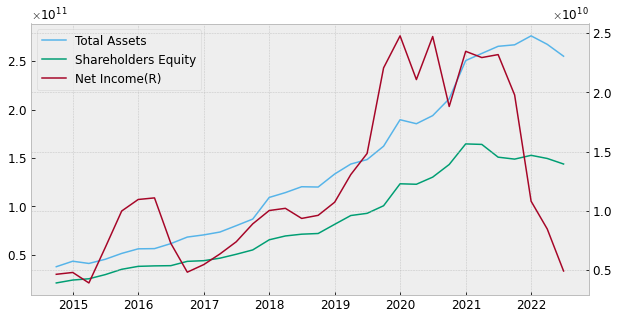

In [6]:
fs.draw_chart(df, left=['Total Assets', 'Shareholders Equity'], right='Net Income')

In [7]:
df['Total Assets'].tail()

2021-06-30    2.653184e+11
2021-09-30    2.668670e+11
2021-12-31    2.761150e+11
2022-03-31    2.673617e+11
2022-06-30    2.551055e+11
Name: Total Assets, dtype: float64

In [8]:
df['Total Assets'].shift(4).tail()

2021-06-30    1.937940e+11
2021-09-30    2.111500e+11
2021-12-31    2.506150e+11
2022-03-31    2.579780e+11
2022-06-30    2.653184e+11
Name: Total Assets, dtype: float64

In [9]:
df['Avg Assets'] = ( df['Total Assets'] + df['Total Assets'].shift(4) ) /2

In [10]:
df['ROA'] = df['Net Income'] / df['Avg Assets']

In [11]:
df[['ROA', 'Net Income', 'Avg Assets']].tail()

,ROA,Net Income,Avg Assets
2021-06-30,0.101026,2.319123e+10,2.295562e+11
2021-09-30,0.082769,1.978260e+10,2.390085e+11
2021-12-31,0.041011,1.080075e+10,2.633650e+11
2022-03-31,0.032191,8.455689e+09,2.626698e+11
2022-06-30,0.018855,4.906402e+09,2.602119e+11


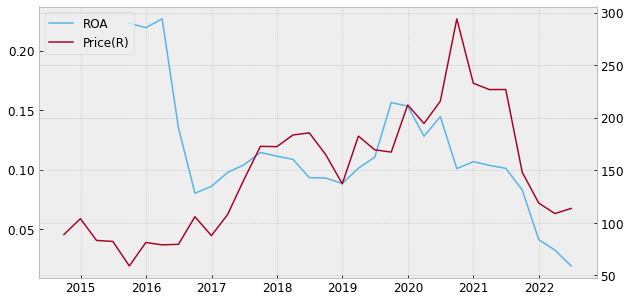

In [12]:
fs.draw_chart(df, left='ROA', right='Price')

In [13]:
df['Avg Equity'] = ( df['Shareholders Equity'] + df['Shareholders Equity'].shift(4) ) /2
df['ROE'] = df['Net Income'] / df['Avg Equity']
df[['ROE', 'Net Income', 'Avg Equity']].tail()

,ROE,Net Income,Avg Equity
2021-06-30,0.164939,2.319123e+10,1.406051e+11
2021-09-30,0.135389,1.978260e+10,1.461171e+11
2021-12-31,0.068060,1.080075e+10,1.586948e+11
2022-03-31,0.053921,8.455689e+09,1.568171e+11
2022-06-30,0.033293,4.906402e+09,1.473701e+11


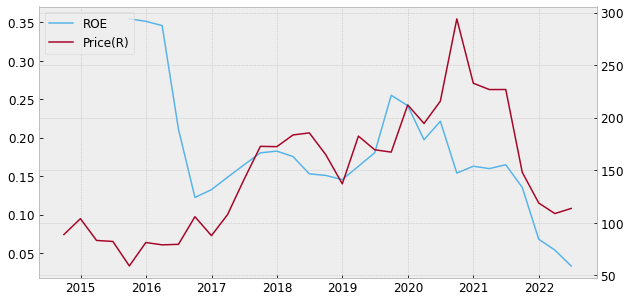

In [14]:
fs.draw_chart(df, left='ROE', right='Price')

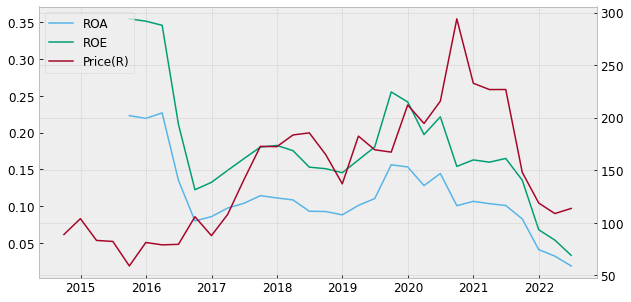

In [15]:
fs.draw_chart(df, left=['ROA', 'ROE'], right='Price')

In [17]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t, study='N')

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [18]:
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')

In [19]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

In [20]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.42%
Accumulated return: 69.61%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -28.02%


In [21]:
# ROA
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.42%
Accumulated return: 69.61%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -28.02%


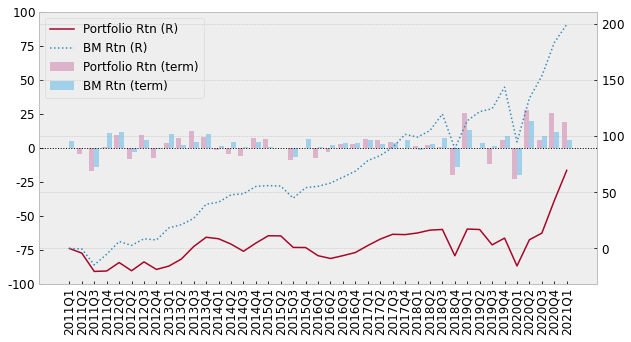

In [22]:
fs.draw_return(df)

In [23]:
# ROE
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 8.48%
Accumulated return: 125.79%
Investment period: 10.0yrs
Sharpe ratio: 0.64
MDD: -27.03%


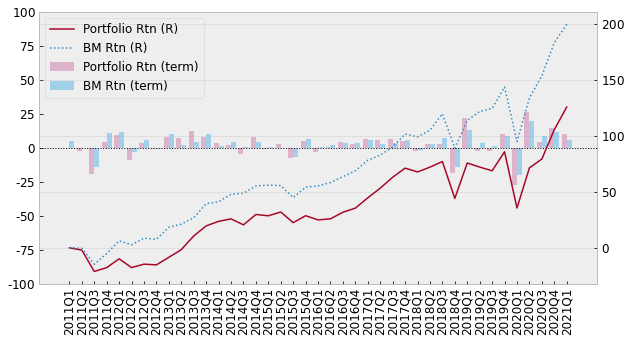

In [24]:
fs.draw_return(df)

In [25]:
# ROE + Debt/Equity
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
s1 = {}
s2 = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = 0
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    s1[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=1000, asc=False)
    s2[t] = fs.fn_filter(data[t], by='Debt/Equity', floor=0, cap=.2, asc=True)
    s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)    
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.12%
Accumulated return: 49.73%
Investment period: 10.0yrs
Sharpe ratio: 0.23
MDD: -35.27%


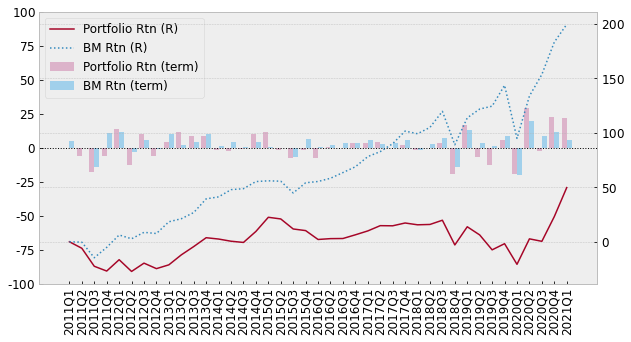

In [27]:
fs.draw_return(df)